In [9]:
import os

print(os.getcwd())







/workspaces/credit-default-prediction/notebooks


In [24]:
os.listdir("../models")


['credit_model.pkl', 'credit_model.joblib']

In [25]:
import joblib

model = joblib.load("../models/credit_model.pkl")
print("Model loaded:", type(model))


Model loaded: <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [26]:
import joblib

joblib.dump(model, "../models/credit_model.joblib")
print("✅ Model saved correctly")


✅ Model saved correctly


In [27]:
os.listdir("../models")


['credit_model.pkl', 'credit_model.joblib']

In [28]:
model = joblib.load("../models/credit_model.joblib")


In [29]:
type(model)


sklearn.linear_model._logistic.LogisticRegression

In [36]:
import pandas as pd

X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

print(X_train.shape, y_train.shape)



(24000, 24) (24000, 1)


In [37]:
import pandas as pd

feature_importance = pd.Series(
    model.coef_[0],
    index=X_train.columns
).sort_values(key=abs, ascending=False)

print(feature_importance.head(10))


PAY_0        0.196909
PAY_2        0.157002
PAY_3        0.137609
PAY_4        0.127041
PAY_5        0.112367
PAY_6        0.105231
EDUCATION   -0.074173
SEX         -0.064041
MARRIAGE    -0.061292
AGE          0.018564
dtype: float64


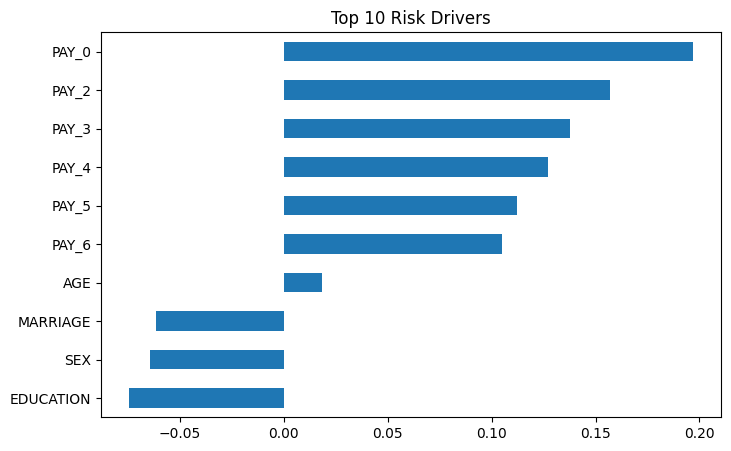

In [38]:
import matplotlib.pyplot as plt

feature_importance.head(10).sort_values().plot(kind="barh", figsize=(8,5), title="Top 10 Risk Drivers")
plt.show()


In [39]:
i = 0  # pick first row of X_train or X_test
sample = X_train.iloc[[i]]
proba = model.predict_proba(sample)[0][1]
decision = "Low/Medium/High Risk"  # apply your threshold logic

print("Default Probability:", round(proba, 3))
print("Decision:", decision)


Default Probability: 0.443
Decision: Low/Medium/High Risk


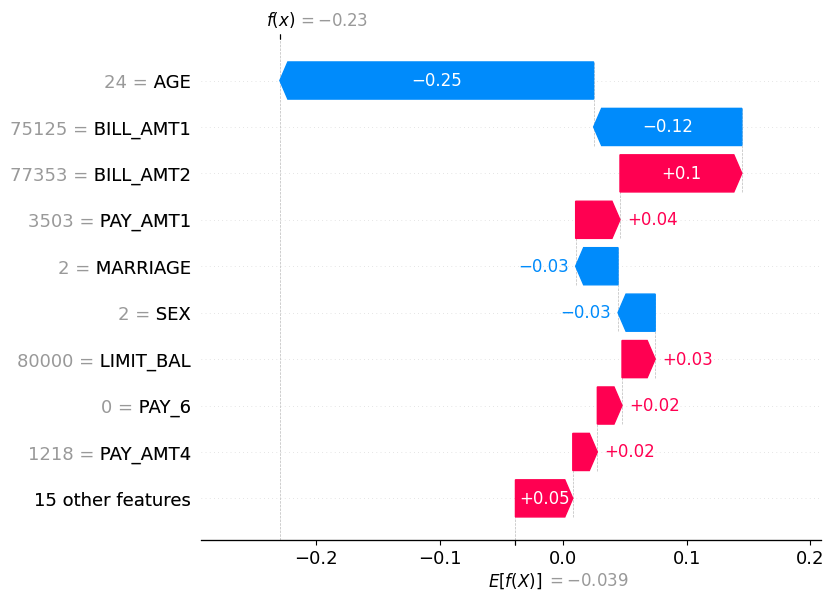

In [40]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(sample)

# Plot local explanation for the first customer
shap.plots.waterfall(shap_values[0])


In [41]:
import pandas as pd
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")


In [42]:
# Probabilities of default
default_probs = model.predict_proba(X_test)[:,1]  # probability of default

# Apply decision threshold (0.5 for binary, you can tune)
threshold = 0.5
y_pred = (default_probs >= threshold).astype(int)


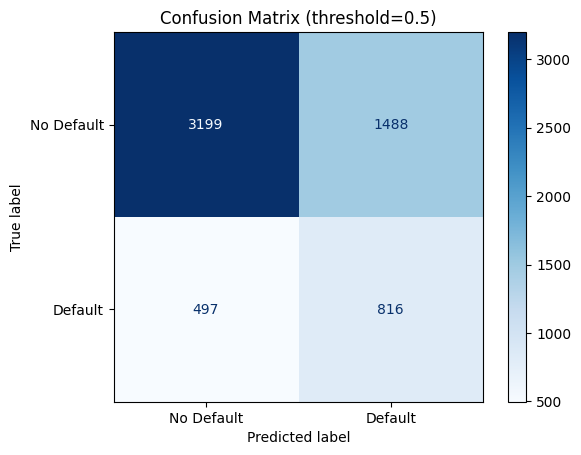

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")


Accuracy: 0.669
Precision: 0.354
Recall: 0.621


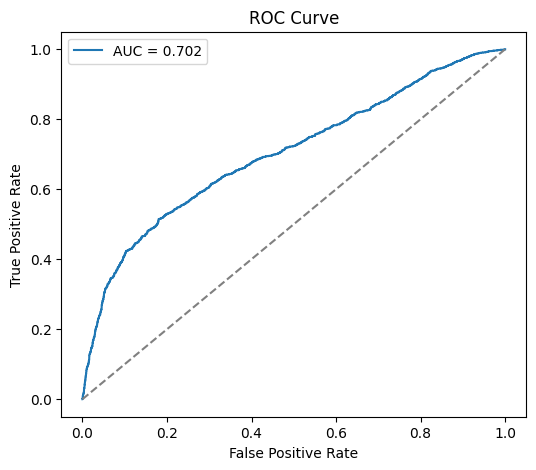

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, default_probs)
auc = roc_auc_score(y_test, default_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [46]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, default_probs)  # default_probs = model.predict_proba(X_test)[:,1]
print(f"AUC: {auc_score:.3f}")


AUC: 0.702


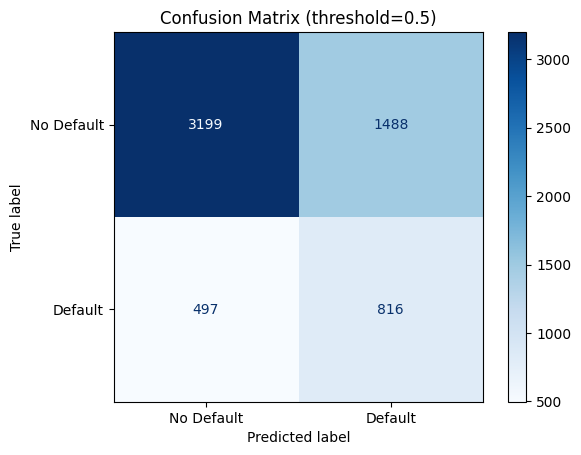

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

threshold = 0.5
y_pred = (default_probs >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()


In [48]:
def decision_rule(p):
    if p < 0.25:
        return "Low Risk - Approve"
    elif p < 0.5:
        return "Medium Risk - Manual Review"
    else:
        return "High Risk - Reject"

decisions = [decision_rule(p) for p in default_probs]

# Example for first 5 customers
for i in range(5):
    print(f"Customer {i+1}: Probability={default_probs[i]:.3f}, Decision={decisions[i]}")


Customer 1: Probability=0.508, Decision=High Risk - Reject
Customer 2: Probability=0.420, Decision=Medium Risk - Manual Review
Customer 3: Probability=0.485, Decision=Medium Risk - Manual Review
Customer 4: Probability=0.554, Decision=High Risk - Reject
Customer 5: Probability=0.506, Decision=High Risk - Reject
